# The global burden of disease attributable to ambient fine particulate matter in 204 countries and territories, 1990–2019: A systematic analysis of the Global Burden of Disease Study 2019
Shaowei Sang et al., 2022

Analisis similar pero considerando datos de paises de latinoamerica y el caribe

In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import os
import pandas as pd
# ubicacion de los archivos
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import scipy.stats as st 
import warnings
warnings.filterwarnings("ignore")
print("librerias ok")

librerias ok


In [15]:
#Directorio
os.chdir("D:/Josefina/Proyectos/Seba/health_impact/data")
data = pd.read_csv("LAT_v02.csv")
data


,Measure,Location,Sex,Age,Cause,Risk,Metric,Year,Value,Upper,Lower
0,Deaths,Jamaica,Male,All ages,All causes,Ambient particulate matter pollution,Number,1990,201.487850,365.290590,90.041005
1,Deaths,Jamaica,Female,All ages,All causes,Ambient particulate matter pollution,Number,1990,168.999035,319.491221,73.312633
2,Deaths,Saint Vincent and the Grenadines,Male,All ages,All causes,Ambient particulate matter pollution,Number,1990,14.066854,29.156350,4.377314
3,Deaths,Saint Vincent and the Grenadines,Female,All ages,All causes,Ambient particulate matter pollution,Number,1990,14.804244,32.180146,4.145356
4,Deaths,Trinidad and Tobago,Male,All ages,All causes,Ambient particulate matter pollution,Number,1990,341.285478,648.807538,86.903624
...,...,...,...,...,...,...,...,...,...,...,...
9235,DALYs,Grenada,Female,70-74 years,All causes,Ambient particulate matter pollution,Rate,2019,5834.239989,9761.716620,2329.068538
9236,DALYs,Grenada,Both sexes,70-74 years,All causes,Ambient particulate matter pollution,Rate,2019,6717.724532,11146.501130,2669.677165
9237,DALYs,Grenada,Male,75-79 years,All causes,Ambient particulate matter pollution,Number,2019,70.124371,115.626665,28.147113
9238,DALYs,Grenada,Female,75-79 years,All causes,Ambient particulate matter pollution,Number,2019,71.238181,116.802180,28.984955


In [3]:
# Funcion para filtrar los datos de las columnas
def filtrado (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] == Cause)  & (data['Year'] == Year)]
    return df_filtrado
def filtrado_2 (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != Age)& (data['Sex'] == Sex)& (data['Cause'] == Cause)  & (data['Year'] == Year)]
    return df_filtrado

prueba_filtro = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "70+ years", Sex="Both sexes", Year=2019)
len(prueba_filtro)

0

A nivel mundial, el número de muertes ambientales atribuibles a PM2,5 fue 4.140.970 (95% UI: 3.454.410, 4.800.290), con 1.702.150 (95% UI: 1.377.520, 2.006.470) para mujeres y 2.438.820 (95% UI: 2.019.430, 2.834.280) para hombres (Tabla 1). El número de PM2.5- ambientales AVAD atribuibles fue de 118,2 (95% UI: 96,0, 138,4) millones, con 47,5 (95% UI: 38,3, 56,5) y 70,7 (95% UI: 57,2, 83,3) millones para mujeres y hombres respectivamente (Tabla S1). 

In [13]:
# Analisis del DALYs
num_daly_airPol_allCause_2019 = filtrado (data = data, Measure = "DALYs", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
num_daly_airPol_allCause_2019_sum = round(num_daly_airPol_allCause_2019['Value'].sum(),2)
num_daly_airPol_allCause_2019_min = round(num_daly_airPol_allCause_2019['Lower'].sum(),2)
num_daly_airPol_allCause_2019_max = round(num_daly_airPol_allCause_2019['Upper'].sum(),2)
print("numero de daly totales atribuibles a aPM2.5 ",num_daly_airPol_allCause_2019_sum, "95% UI:",num_daly_airPol_allCause_2019_min,",",num_daly_airPol_allCause_2019_max)
len(num_daly_airPol_allCause_2019)
# Numero de muertes de mujeres atribuibles a aPM2.5 

num_daly_airPol_allCause_2019_fem = filtrado (data = data, Measure = "DALYs", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Female", Year=2019)
num_daly_airPol_allCause_2019_sum_fem = round(num_daly_airPol_allCause_2019_fem['Value'].sum(),2)
num_daly_airPol_allCause_2019_min_fem = round(num_daly_airPol_allCause_2019_fem['Lower'].sum(),2)
num_daly_airPol_allCause_2019_max_fem = round(num_daly_airPol_allCause_2019_fem['Upper'].sum(),2)
print("numero de daly de mujeres atribuibles a aPM2.5 ",num_daly_airPol_allCause_2019_sum_fem , "95% UI:",num_daly_airPol_allCause_2019_min_fem ,",",num_daly_airPol_allCause_2019_max_fem )
len(num_daly_airPol_allCause_2019_fem)
# Numero de dalys de hombres atribuibles a aPM2.5
num_daly_airPol_allCause_2019_hom = filtrado (data = data, Measure = "DALYs", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Male", Year=2019)
num_daly_airPol_allCause_2019_sum_hom = round(num_daly_airPol_allCause_2019_hom['Value'].sum(),2)
num_daly_airPol_allCause_2019_min_hom = round(num_daly_airPol_allCause_2019_hom['Lower'].sum(),2)
num_daly_airPol_allCause_2019_max_hom = round(num_daly_airPol_allCause_2019_hom['Upper'].sum(),2)
print("numero de daly de hombres atribuibles a aPM2.5 ",num_daly_airPol_allCause_2019_sum_hom , "95% UI:",num_daly_airPol_allCause_2019_min_hom ,",",num_daly_airPol_allCause_2019_max_hom)
len(num_daly_airPol_allCause_2019_hom)


numero de daly totales atribuibles a aPM2.5  4662958.12 95% UI: 3182382.14 , 6426067.34
numero de daly de mujeres atribuibles a aPM2.5  1989220.87 95% UI: 1337982.43 , 2764557.87
numero de daly de hombres atribuibles a aPM2.5  2673737.26 95% UI: 1808923.64 , 3712805.31


35

In [11]:
# numero de muertes totales atribuibles a aPM2.5 
# Analisis del numero de muertes
num_death_airPol_allCause_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
num_death_airPol_allCause_2019_sum = round(num_death_airPol_allCause_2019['Value'].sum(),2)
num_death_airPol_allCause_2019_min = round(num_death_airPol_allCause_2019['Lower'].sum(),2)
num_death_airPol_allCause_2019_max = round(num_death_airPol_allCause_2019['Upper'].sum(),2)
print("numero de muertes totales atribuibles a aPM2.5 ",num_death_airPol_allCause_2019_sum, "95% UI:",num_death_airPol_allCause_2019_min,",",num_death_airPol_allCause_2019_max)
len(num_death_airPol_allCause_2019)
# Numero de muertes de mujeres atribuibles a aPM2.5 

num_death_airPol_allCause_2019_fem = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Female", Year=2019)
num_death_airPol_allCause_2019_sum_fem = round(num_death_airPol_allCause_2019_fem['Value'].sum(),2)
num_death_airPol_allCause_2019_min_fem = round(num_death_airPol_allCause_2019_fem['Lower'].sum(),2)
num_death_airPol_allCause_2019_max_fem = round(num_death_airPol_allCause_2019_fem['Upper'].sum(),2)
print("numero de muertes de mujeres atribuibles a aPM2.5 ",num_death_airPol_allCause_2019_sum_fem , "95% UI:",num_death_airPol_allCause_2019_min_fem ,",",num_death_airPol_allCause_2019_max_fem )
len(num_death_airPol_allCause_2019_fem)
# Numero de muertes de hombres atribuibles a aPM2.5
num_death_airPol_allCause_2019_hom = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Male", Year=2019)
num_death_airPol_allCause_2019_sum_hom = round(num_death_airPol_allCause_2019_hom['Value'].sum(),2)
num_death_airPol_allCause_2019_min_hom = round(num_death_airPol_allCause_2019_hom['Lower'].sum(),2)
num_death_airPol_allCause_2019_max_hom = round(num_death_airPol_allCause_2019_hom['Upper'].sum(),2)
print("numero de muertes de hombres atribuibles a aPM2.5 ",num_death_airPol_allCause_2019_sum_hom , "95% UI:",num_death_airPol_allCause_2019_min_hom ,",",num_death_airPol_allCause_2019_max_hom)
len(num_death_airPol_allCause_2019_hom)


porc_hombres = round((num_death_airPol_allCause_2019_sum_hom/num_death_airPol_allCause_2019_sum)*100,2)

porc_fem = round((num_death_airPol_allCause_2019_sum_fem/num_death_airPol_allCause_2019_sum)*100,2)
print("% numero de muertes de hombres atribuibles a aPM2.5 ",porc_hombres)
print("% numero de muertes de mujeres atribuibles a aPM2.5 ",porc_fem)

numero de muertes totales atribuibles a aPM2.5  167819.93 95% UI: 113001.28 , 232913.27
numero de muertes de mujeres atribuibles a aPM2.5  75082.73 95% UI: 50105.01 , 104979.57
numero de muertes de hombres atribuibles a aPM2.5  92737.2 95% UI: 61992.34 , 129220.82
% numero de muertes de hombres atribuibles a aPM2.5  55.26
% numero de muertes de mujeres atribuibles a aPM2.5  44.74


In [12]:
# metricas paper 
# A nivel mundial, el número de muertes atribuibles a PM2.5 ambiental fue de 4,140,970 (95% UI: 3,454,410, 4,800,290),
# con 1,702,150 (95% UI: 1,377,520, 2,006,470) para mujeres y 2,438,820 (95% UI: 2,019,430, 2,834,280) para hombres 
# (Tabla 1). El número de AVAD atribuibles a PM2.5 ambiental fue de 118.2 (95% UI: 96.0, 138.4) millones, con 47.5 
# (95% UI: 38.3, 56.5) y  70.7 (95% UI: 57.2, 83.3) millones para mujeres y hombres respectivamente (Tabla S1).
num_munto_tot = 4140970
num_hombres_mundo = 2438820
num_fem_mundo = 1702150
porc_hombres_mundo = round((num_hombres_mundo/num_munto_tot)*100,2)
porc_fem_mundo = round((num_fem_mundo/num_munto_tot)*100,2)

print("% numero de muertes de hombres atribuibles a aPM2.5 del mundo ",porc_hombres_mundo)
print("% numero de muertes de mujeres atribuibles a aPM2.5 del mundo  ",porc_fem_mundo)

% numero de muertes de hombres atribuibles a aPM2.5 del mundo  58.89
% numero de muertes de mujeres atribuibles a aPM2.5 del mundo   41.11


In [17]:
# Agrupar por rango de edad y sexo, y sumar los valores
df_agrupado = data.groupby(['Age', 'Sex'])['Value'].sum().reset_index()
df_agrupado

,Age,Sex,Value
0,1-4 years,Both sexes,3.877551e+04
1,1-4 years,Female,2.064500e+04
2,1-4 years,Male,2.087389e+04
3,10-14 years,Both sexes,6.580460e+03
4,10-14 years,Female,3.340032e+03
...,...,...,...
61,<1 year,Female,3.500965e+05
62,<1 year,Male,4.579534e+05
63,All ages,Both sexes,8.701123e+06
64,All ages,Female,3.680776e+06


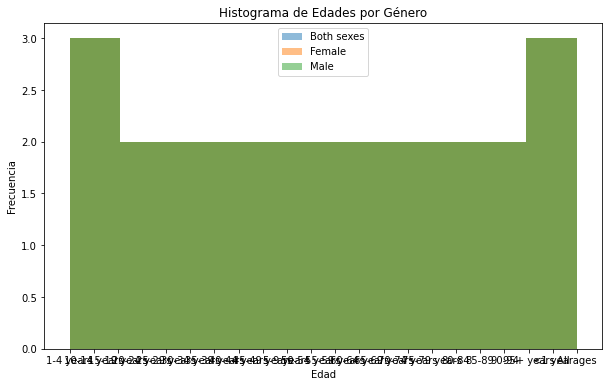

In [18]:
plt.figure(figsize=(10, 6))

# Filtrar por género
for gender in df_agrupado['Sex'].unique():
    data_gender = df_agrupado[df_agrupado['Sex'] == gender]
    plt.hist(data_gender['Age'], bins=10, alpha=0.5, label=gender)

# Configurar el gráfico
plt.title('Histograma de Edades por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()